# Data analysis

- Which customers placed the most and fewest orders?
- Which customers spent the most and least money?
- Which months were the most and least popular for this online retail store?
- Which dates of the month were the most and least popular for this online retail store?
- Which days were the most and least popular for this online retail store?
- Which hours of the day were most and least popular for this online retail store?
- Which items were ordered the most and least?
- Which countries placed the most and fewest orders?
- Which countries spent the most and least money?

<a id="importing"></a>
## Importing libraries and packages

In [1]:
# Mathematical operations and data manipulation
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt

# Warnings
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

<a id="set-paths"></a>
## Set paths

In [2]:
# Path to datasets directory
data_path = "./datasets"
# Path to assets directory (for saving results to)
assets_path = "./assets"

<a id="loading-data"></a>
## Loading dataset

In [3]:
# load data
dataset = pd.read_csv(f"{data_path}/engineered_retail.csv")
dataset.head().T

0                    1  \
invoice                                   489434               489434   
country                           United Kingdom       United Kingdom   
cust_id                                  13085.0              13085.0   
stock_code                                 85048               79323P   
desc         15cm christmas glass ball 20 lights   pink cherry lights   
quantity                                      12                   12   
unit_price                                  6.95                 6.75   
date                         2009-12-01 07:45:00  2009-12-01 07:45:00   
spent                                       83.4                 81.0   
year_month                                200912               200912   
year                                        2009                 2009   
month                                         12                   12   
day                                            1                    1   
day_of_week                                    2                    2   
hour                                           7                    7   

                                2                             3  \
invoice                    489434                        489434   
country            United Kingdom                United Kingdom   
cust_id                   13085.0                       13085.0   
stock_code                 79323W                         22041   
desc          white cherry lights  record frame 7" single size    
quantity                       12                            48   
unit_price                   6.75                           2.1   
date          2009-12-01 07:45:00           2009-12-01 07:45:00   
spent                        81.0                         100.8   
year_month                 200912                        200912   
year                         2009                          2009   
month                          12                            12   
day                             1                             1   
day_of_week                     2                             2   
hour                            7                             7   

                                          4  
invoice                              489434  
country                      United Kingdom  
cust_id                             13085.0  
stock_code                            21232  
desc         strawberry ceramic trinket box  
quantity                                 24  
unit_price                             1.25  
date                    2009-12-01 07:45:00  
spent                                  30.0  
year_month                           200912  
year                                   2009  
month                                    12  
day                                       1  
day_of_week                               2  
hour                                      7

<a id="analysis"></a>
## Data analysis

Which customers placed the most and fewest orders?

In [4]:
# Orders by each customer
ord_cust = dataset.groupby(by=["cust_id", "country"], as_index=False)[
    "invoice"
].count()
ord_cust.head(10)

cust_id         country  invoice
0  12346.0  United Kingdom       33
1  12347.0         Iceland       71
2  12348.0         Finland       20
3  12349.0           Italy      102
4  12351.0     Unspecified       21
5  12352.0          Norway       18
6  12353.0         Bahrain       20
7  12355.0         Bahrain       22
8  12356.0        Portugal       84
9  12357.0     Switzerland      165

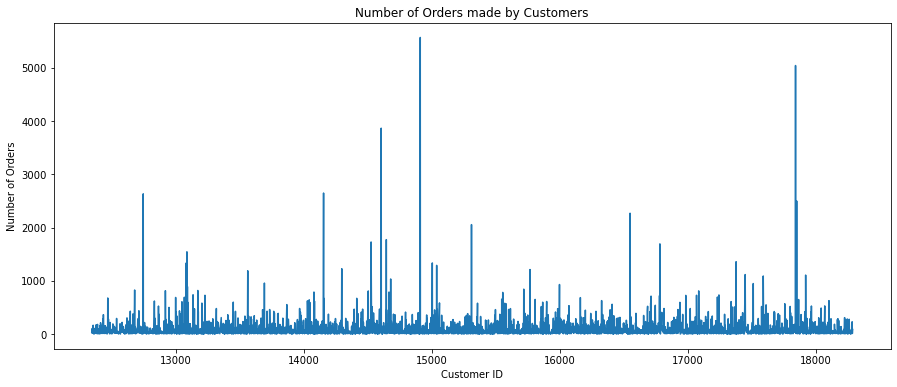

In [5]:
plt.subplots(figsize=(15, 6))
oc = plt.plot(ord_cust.cust_id, ord_cust.invoice)
plt.xlabel("Customer ID")
plt.ylabel("Number of Orders")
plt.title("Number of Orders made by Customers")
plt.show()

In [6]:
# The top 5 customers
ord_cust.describe()

cust_id      invoice
count   4315.000000  4315.000000
mean   15346.442642    94.474623
std     1702.986420   201.977000
min    12346.000000     1.000000
25%    13878.500000    18.000000
50%    15346.000000    44.000000
75%    16833.500000   102.000000
max    18287.000000  5570.000000

In [7]:
# 5 customers who ordered the most often
ord_cust.sort_values(by="invoice", ascending=False).head()

cust_id         country  invoice
1844  14911.0            EIRE     5570
3992  17841.0  United Kingdom     5043
1610  14606.0  United Kingdom     3866
1273  14156.0            EIRE     2648
256   12748.0  United Kingdom     2633

In [8]:
# Who placed the fewest orders
ord_cust.sort_values(by="invoice", ascending=False).tail()

cust_id         country  invoice
1233  14095.0  United Kingdom        1
1239  14106.0  United Kingdom        1
2752  16165.0  United Kingdom        1
3655  17378.0  United Kingdom        1
1427  14366.0  United Kingdom        1

Which customers spent the most and least money on an item?

In [9]:
spent_cust = dataset.groupby(
    by=["cust_id", "country", "quantity", "unit_price"], as_index=False
)["spent"].sum()
spent_cust.head()

cust_id         country  quantity  unit_price   spent
0  12346.0  United Kingdom         1        1.00    1.00
1  12346.0  United Kingdom         1        3.25    3.25
2  12346.0  United Kingdom         1        5.95   23.80
3  12346.0  United Kingdom         1        7.49  142.31
4  12346.0  United Kingdom         5        4.50  157.50

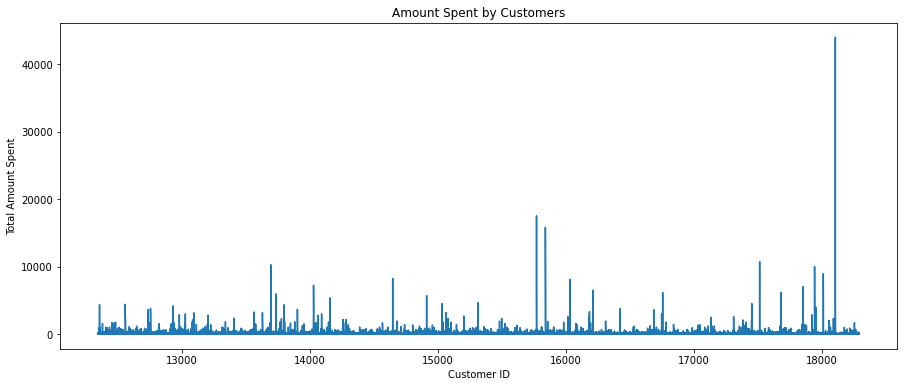

In [10]:
plt.subplots(figsize=(15, 6))
sc = plt.plot(spent_cust.cust_id, spent_cust.spent)
plt.xlabel("Customer ID")
plt.ylabel("Total Amount Spent")
plt.title("Amount Spent by Customers")
plt.show()

In [11]:
# Spent the most
spent_cust.sort_values(by="spent", ascending=False).head()

cust_id         country  quantity  unit_price    spent
144871  18102.0  United Kingdom       300        4.58  43968.0
144915  18102.0  United Kingdom       600        3.00  18000.0
82744   15769.0  United Kingdom       200        1.65  17490.0
84312   15838.0  United Kingdom      9360        1.69  15818.4
144912  18102.0  United Kingdom       576        3.00  13824.0

In [12]:
# Spent the least
spent_cust.sort_values(by="spent", ascending=False).tail()

cust_id         country  quantity  unit_price  spent
21568  13317.0  United Kingdom         1       0.001  0.001
61105  14857.0  United Kingdom         1       0.001  0.001
48967  14459.0  United Kingdom         1       0.001  0.001
6111   12671.0         Germany         1       0.001  0.001
32451  13765.0  United Kingdom         1       0.001  0.001

Which months were the most and least popular for this online retail store?

In [13]:
ord_month = (
    dataset.groupby(["invoice"])["year_month"]
    .unique()
    .value_counts()
    .sort_index()
)
ord_month

[200912]    1512
[201001]    1010
[201002]    1104
[201003]    1521
[201004]    1329
[201005]    1377
[201006]    1497
[201007]    1381
[201008]    1293
[201009]    1688
[201010]    2133
[201011]    2587
[201012]     776
Name: year_month, dtype: int64

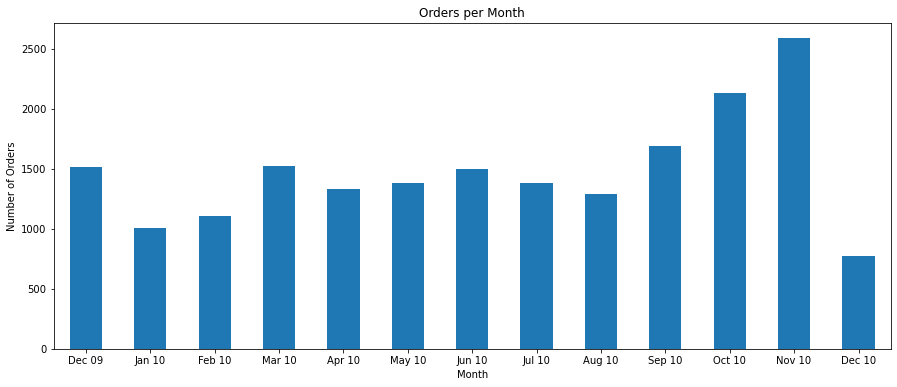

In [14]:
om = ord_month.plot(kind="bar", figsize=(15, 6))
om.set_xlabel("Month")
om.set_ylabel("Number of Orders")
om.set_title("Orders per Month")
om.set_xticklabels(
    (
        "Dec 09",
        "Jan 10",
        "Feb 10",
        "Mar 10",
        "Apr 10",
        "May 10",
        "Jun 10",
        "Jul 10",
        "Aug 10",
        "Sep 10",
        "Oct 10",
        "Nov 10",
        "Dec 10",
    ),
    rotation="horizontal",
)
plt.show()

Which dates of the month were the most and least popular for this online retail store?

In [15]:
ord_day = (
    dataset.groupby("invoice")["day"].unique().value_counts().sort_index()
)
ord_day

[1]     708
[2]     696
[3]     610
[4]     595
[5]     661
[6]     572
[7]     812
[8]     827
[9]     689
[10]    609
[11]    655
[12]    576
[13]    512
[14]    634
[15]    732
[16]    617
[17]    600
[18]    687
[19]    601
[20]    506
[21]    649
[22]    636
[23]    573
[24]    602
[25]    667
[26]    672
[27]    517
[28]    671
[29]    614
[30]    457
[31]    251
Name: day, dtype: int64

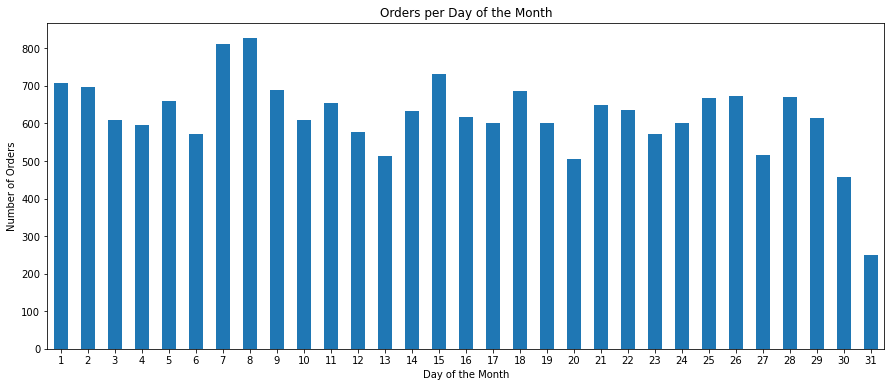

In [16]:
od = ord_day.plot(kind="bar", figsize=(15, 6))
od.set_xlabel("Day of the Month")
od.set_ylabel("Number of Orders")
od.set_title("Orders per Day of the Month")
od.set_xticklabels(labels=[i for i in range(1, 32)], rotation="horizontal")
plt.show()

Which days were the most and least popular for this online retail store?

In [17]:
ord_dayofweek = (
    dataset.groupby("invoice")["day_of_week"]
    .unique()
    .value_counts()
    .sort_index()
)
ord_dayofweek

[1]    2985
[2]    3513
[3]    3426
[4]    3976
[5]    2612
[6]      30
[7]    2666
Name: day_of_week, dtype: int64

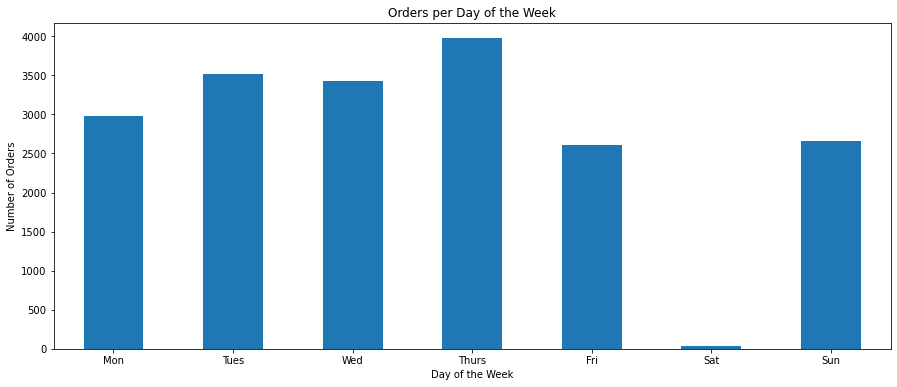

In [18]:
odw = ord_dayofweek.plot(kind="bar", figsize=(15, 6))
odw.set_xlabel("Day of the Week")
odw.set_ylabel("Number of Orders")
odw.set_title("Orders per Day of the Week")
odw.set_xticklabels(
    labels=["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"],
    rotation="horizontal",
)
plt.show()

Which hours of the day were most and least popular for this online retail store?

In [19]:
ord_hour = (
    dataset.groupby(by=["invoice"])["hour"]
    .unique()
    .value_counts()
    .sort_index()
)
ord_hour

[7]       49
[8]      444
[9]     1209
[10]    2232
[11]    2407
[12]    3173
[13]    2891
[14]    2365
[15]    2061
[16]    1263
[17]     637
[18]     258
[19]     185
[20]      34
Name: hour, dtype: int64

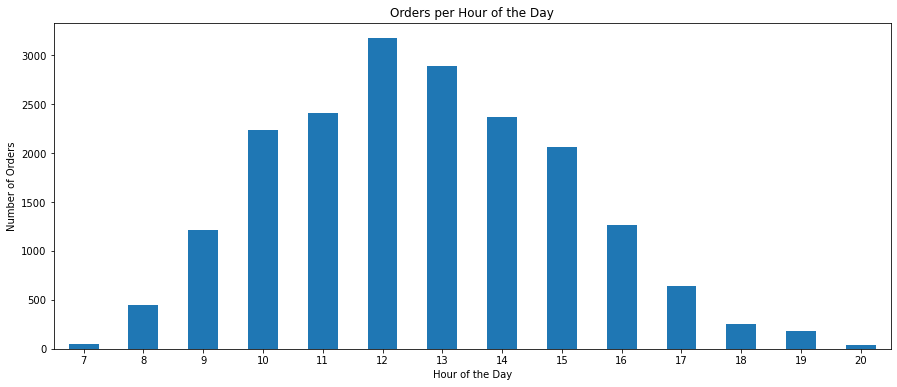

In [20]:
oh = ord_hour.plot(kind="bar", figsize=(15, 6))
oh.set_xlabel("Hour of the Day")
oh.set_ylabel("Number of Orders")
oh.set_title("Orders per Hour of the Day")
oh.set_xticklabels(labels=[i for i in range(7, 21)], rotation="horizontal")
plt.show()

Which items were ordered the most and least?

In [21]:
q_item = dataset.groupby(by=["desc"], as_index=False)["quantity"].sum()
q_item.head()

desc  quantity
0    doormat union jack guns and roses       169
1             3 stripey mice feltcraft       663
2        4 purple flock dinner candles       200
3                      animal stickers       385
4                         bank charges         2

In [22]:
q_item.sort_values(by="quantity", ascending=False).head()

desc  quantity
4260  white hanging heart t-light holder     56915
4366   world war 2 gliders asstd designs     54754
691                  brocade ring purse      48166
2632    pack of 72 retro spot cake cases     45156
262        assorted colour bird ornament     44551

In [23]:
q_item.sort_values(by="quantity", ascending=False).tail()

desc  quantity
2544    opal white/silver flower necklace         1
1789        green chenille shaggy c/cover         1
2337  midnight blue crystal drop earrings         1
3728               silicon cube 25w, blue         1
1381     f.fairy s/3 sml candle, lavender         1

Which countries placed the most and fewest orders?

In [24]:
ord_coun = dataset.groupby(["country"])["invoice"].count().sort_values()
ord_coun.head()

country
Nigeria        30
Bahrain        42
Korea          53
West Indies    54
Brazil         62
Name: invoice, dtype: int64

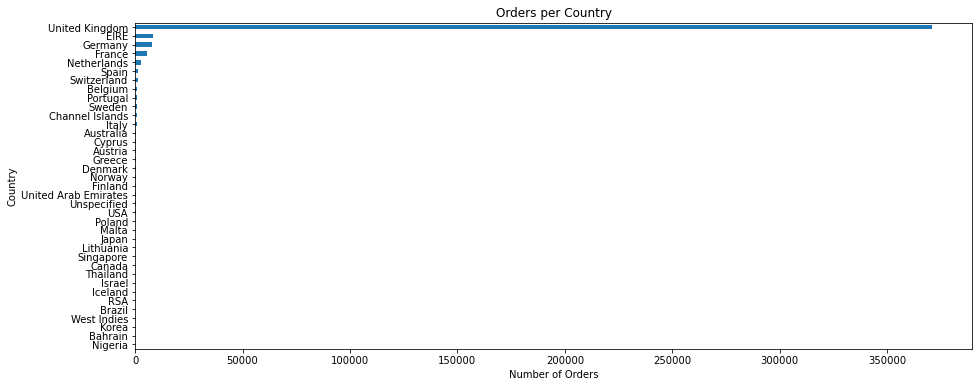

In [25]:
ocoun = ord_coun.plot(kind="barh", figsize=(15, 6))
ocoun.set_xlabel("Number of Orders")
ocoun.set_ylabel("Country")
ocoun.set_title("Orders per Country")
plt.show()

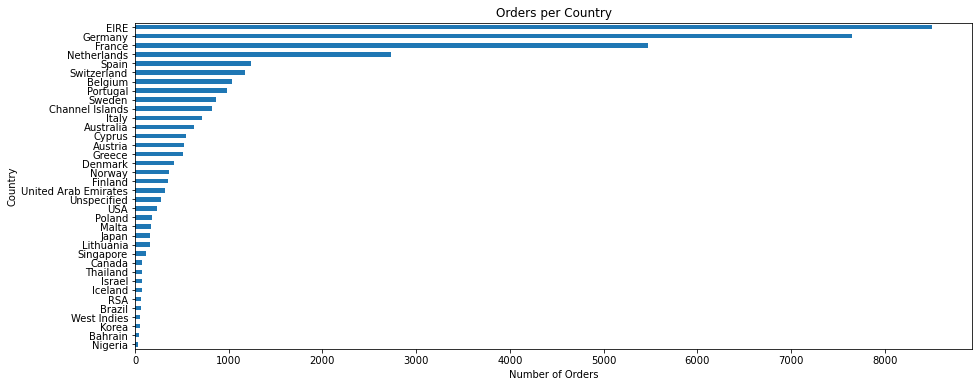

In [26]:
del ord_coun["United Kingdom"]

ocoun2 = ord_coun.plot(kind="barh", figsize=(15, 6))
ocoun2.set_xlabel("Number of Orders")
ocoun2.set_ylabel("Country")
ocoun2.set_title("Orders per Country")
plt.show()

Which countries spent the most and least money?

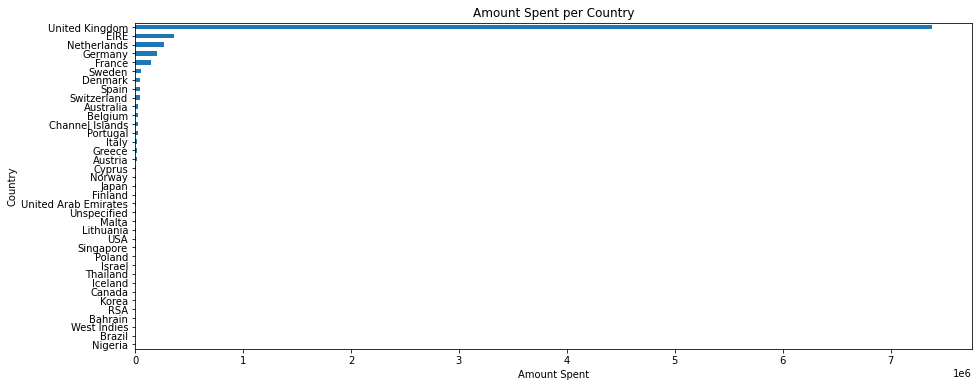

In [27]:
coun_spent = dataset.groupby("country")["spent"].sum().sort_values()

cs = coun_spent.plot(kind="barh", figsize=(15, 6))
cs.set_xlabel("Amount Spent")
cs.set_ylabel("Country")
cs.set_title("Amount Spent per Country")
plt.show()

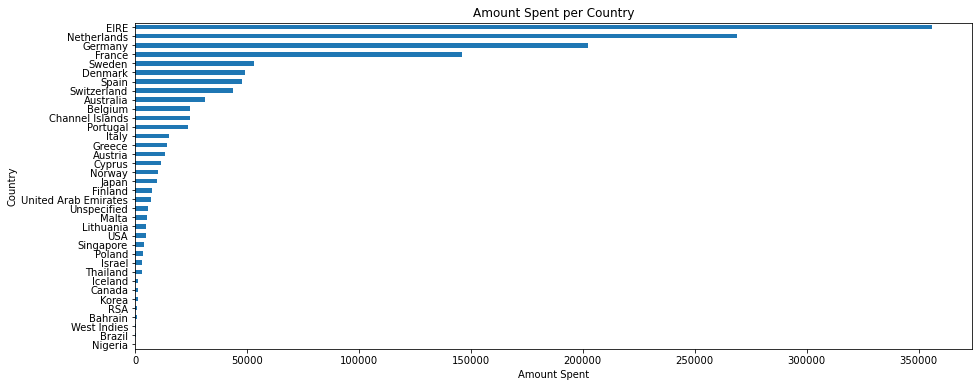

In [28]:
del coun_spent["United Kingdom"]

cs2 = coun_spent.plot(kind="barh", figsize=(15, 6))
cs2.set_xlabel("Amount Spent")
cs2.set_ylabel("Country")
cs2.set_title("Amount Spent per Country")
plt.show()